In [38]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import math
import numpy as np
from sklearn import utils
from functools import partial
tf.set_random_seed(777)
import sys

def norm(Data):
    
    return ((Data - Data.mean())/Data.std())

def preprocess(Data,max_norm=50,min_norm=10):
    #normalization
    Data = (Data - Data.min())/(Data.max() - Data.min())*(max_norm - min_norm) + min_norm
    # for i in range(len(Data.columns)):
    #     Data[Data.columns[i]] = (Data[Data.columns[i]] - Data[Data.columns[i]].mean())/Data[Data.columns[i]].std()
    #     print('standardized')
    #standardization
    #for i in range(len(Data.columns)):
    #    if Data[Data.columns[i]].std()*3 > (Data[Data.columns[i]].max()-Data[Data.columns[i]].min()):
    #        Data[Data.columns[i]] = (Data[Data.columns[i]] - Data[Data.columns[i]].mean())/Data[Data.columns[i]].std()
    #        print('standardized %d'%i)
    #    else:
    #        Data = (Data - Data.min())/(Data.max() - Data.min())*(max_norm - min_norm) + min_norm
    return Data

# mod = sys.modules[__name__]
# num_Data_case = 9
# for i in range(num_Data_case):
#     setattr(mod,'Data{}'.format(i+1),)
    
    
    
Data1 = pd.read_csv(r'D:\Desktop\190925\Python_scripts\Data\case1_RANS_wedge_trim.csv')
Data2 = pd.read_csv(r'D:\Desktop\190925\Python_scripts\Data\case2_RANS_wedge_trim.csv')
Data3 = pd.read_csv(r'D:\Desktop\190925\Python_scripts\Data\case3_RANS_wedge_trim.csv')
# Data4 = pd.read_csv(r'D:\Desktop\190925\wedge_pr_t\csv_file\RANS_wedge_Re400_Pr02.csv')
# Data5 = pd.read_csv(r'D:\Desktop\190925\wedge_pr_t\csv_file\RANS_wedge_Re400_Pr07.csv')
# Data6 = pd.read_csv(r'D:\Desktop\190925\wedge_pr_t\csv_file\RANS_wedge_Re400_Pr20.csv')
# Data7 = pd.read_csv(r'D:\Desktop\190925\wedge_pr_t\csv_file\RANS_wedge_Re590_Pr02.csv')
# Data8 = pd.read_csv(r'D:\Desktop\190925\wedge_pr_t\csv_file\RANS_wedge_Re590_Pr07.csv')
# Data9 = pd.read_csv(r'D:\Desktop\190925\wedge_pr_t\csv_file\RANS_wedge_Re590_Pr20.csv')
# Data10 = pd.read_csv(r'D:\Desktop\190925\wedge_pr_t\csv_file\RANS_flat_.csv')
# Data10['Re_tau'] = Data10['Re_tau']/1000
Data = pd.concat([Data1,Data2,Data3])

after_data = pd.DataFrame()
after_data['X'] = Data.pop('X')
after_data['Y'] = Data.pop('Y')
after_data['Re_tau'] = Data.pop('Re_tau')
after_data['Pr'] = Data['Pr']
after_data['Alpha_t_lsq'] = Data.pop('Alpha_t_lsq')
# del Data['Re_tau']
# del Data['X']
# del Data['Y']
# del Data['y_plus']
# del Data['wedge_height']
# del Data['Alpha_t_lsq']
# del Data['Pr']
# del Data['Re']

# Data = pd.DataFrame()
# Data['dk_dx_i_abs'] = data['dk_dx_i_abs']
# Data['dT/dx'] = data['dT/dx']
# Data['dT/dy'] = data['dT/dy']
# # Data['Nu_t_lsq_n'] = data['Nu_t_lsq_n']
# Data['PHI-Alpha_t_lsq_n'] = data['PHI-Alpha_t_lsq_n']
# # Data['PHI-Pr_t_new'] = data['PHI-Pr_t_new']

denorm_min = Data['Pr_t'].min()
denorm_max = Data['Pr_t'].max()

norm_Data = norm(Data)
pre_Data = preprocess(norm_Data)

X_Data = pre_Data[pre_Data.columns[:-1]]
X_length = len(X_Data.columns)
Y_Data = pre_Data[pre_Data.columns[-1:]]


x_train, x_test, y_train, y_test = train_test_split(X_Data,Y_Data, test_size=0.33, random_state=42)

train_index = y_train.index.values
test_index = y_test.index.values

# nu_t = x_test['Nu_t_lsq_n']
# train_index = x_train['Y']
# test_index = x_test['Y']

# del x_train['Y']
# del x_test['Y']

# x_train = norm(x_train)
# x_test = norm(x_test)
# y_train = norm(y_train)
# y_test = norm(y_test)

# x_train = preprocess(x_train)
# x_test = preprocess(x_test)
# y_train = preprocess(y_train)
# y_test = preprocess(y_test)

# train_index = 

x_train = x_train.values.tolist()
x_test = x_test.values.tolist()
y_train = y_train.values.tolist()
y_test = y_test.values.tolist()

learning_rate = 0.00001
l2_reg = 0.0001
training = tf.placeholder_with_default(False, shape=[], name="training")
batch_norm_momentum = 0.9
# n_epochs = 10000
# batch_size = 128

he_init = tf.keras.initializers.he_normal()
l2_regularizer = tf.contrib.layers.l2_regularizer(scale=l2_reg)
dense_layer = partial(tf.layers.dense, activation=None,kernel_initializer=he_init,use_bias=True, kernel_regularizer=l2_regularizer)
batch_norm_layer = partial(tf.layers.batch_normalization, training=training, momentum=batch_norm_momentum)

X = tf.placeholder(tf.float32, shape=[None, X_length])
Y = tf.placeholder(tf.float32, shape=[None, 1])
is_training = tf.placeholder(tf.bool)

hidden1 = dense_layer(X,40)
bn1 = batch_norm_layer(hidden1)
bn1_act = tf.nn.tanh(bn1)
# hidden1 = tf.layers.dropout(hidden1, 0.8, is_training)
hidden2 = dense_layer(bn1_act,40)
bn2 = batch_norm_layer(hidden2)
bn2_act = tf.nn.tanh(bn2)
hidden3 = dense_layer(bn2_act,40)
bn3 = batch_norm_layer(hidden3)
bn3_act = tf.nn.tanh(bn3)
hidden4 = dense_layer(bn3_act,40)
bn4 = batch_norm_layer(hidden4)
bn4_act = tf.nn.tanh(bn4)
hidden5 = dense_layer(bn4_act,32)
bn5 = batch_norm_layer(hidden5)
bn5_act = tf.nn.tanh(bn5)
hidden6 = dense_layer(bn5_act,16)
bn6 = batch_norm_layer(hidden6)
bn6_act = tf.nn.tanh(bn6)
hidden7 = dense_layer(bn6_act,16)
bn7 = batch_norm_layer(hidden7)
bn7_act = tf.nn.tanh(bn7)
hidden8 = dense_layer(bn7_act,8)
bn8 = batch_norm_layer(hidden8)
bn8_act = tf.nn.tanh(bn8)
hidden9 = dense_layer(bn8_act,8)
bn9 = batch_norm_layer(hidden9)
bn9_act = tf.nn.tanh(bn9)
hidden10 = dense_layer(bn9_act,8)
bn10 = batch_norm_layer(hidden10)
bn10_act = tf.nn.tanh(bn10)
hidden11 = dense_layer(bn10_act,1,use_bias=False)

reconstruction_loss = tf.reduce_mean(tf.square(hidden11 - Y))
reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
loss = tf.add_n([reconstruction_loss] + reg_losses)

train_op = tf.train.AdamOptimizer(learning_rate).minimize(loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
sess.run(tf.local_variables_initializer())

# while math.isnan(sess.run(reconstruction_loss),feed_dict={X: x_test, Y: y_test, is_training: False}) == True:
#     sess.run(tf.global_variables_initializer())
#     sess.run(tf.local_variables_initializer())
    
num_over = 0
epochs = 1000
batch_size = 256
shuffle = True

for epoch_index in range(epochs):
    if shuffle:
        utils.shuffle(x_train, y_train)
    total_batch = int(np.ceil(len(x_train) / batch_size))
    for batch_index in range(total_batch):
        start = batch_index*batch_size
        end = start + batch_size
        x_train_batch = x_train[start:end]
        y_train_batch = y_train[start:end]
        sess.run(train_op, feed_dict={X: x_train_batch, Y:y_train_batch,is_training:True})
    
    loss_value_train = sess.run(loss, feed_dict={X: x_train, Y: y_train,is_training:False})
    loss_value_test = sess.run(loss, feed_dict={X: x_test, Y: y_test,is_training:False})
    print('epoch: {}/{}, train loss: {:.4f}, test loss: {:.4f}'.format(epoch_index+1,epochs,loss_value_train,loss_value_test))

epoch: 1/1000, train loss: 285.3080, test loss: 285.1842
epoch: 2/1000, train loss: 276.3896, test loss: 276.2621
epoch: 3/1000, train loss: 270.3400, test loss: 270.2122
epoch: 4/1000, train loss: 265.1137, test loss: 264.9868
epoch: 5/1000, train loss: 260.3383, test loss: 260.2125
epoch: 6/1000, train loss: 255.8705, test loss: 255.7457
epoch: 7/1000, train loss: 251.6582, test loss: 251.5344
epoch: 8/1000, train loss: 247.6800, test loss: 247.5572
epoch: 9/1000, train loss: 243.9246, test loss: 243.8028
epoch: 10/1000, train loss: 240.3807, test loss: 240.2599
epoch: 11/1000, train loss: 237.0335, test loss: 236.9136
epoch: 12/1000, train loss: 233.8665, test loss: 233.7474
epoch: 13/1000, train loss: 230.8630, test loss: 230.7447
epoch: 14/1000, train loss: 228.0079, test loss: 227.8904
epoch: 15/1000, train loss: 225.2878, test loss: 225.1711
epoch: 16/1000, train loss: 222.6909, test loss: 222.5749
epoch: 17/1000, train loss: 220.2057, test loss: 220.0904
epoch: 18/1000, train l

KeyboardInterrupt: 

In [ ]:
for epoch_index in range(epochs):
    if shuffle:
        utils.shuffle(x_train, y_train)
    total_batch = int(np.ceil(len(x_train) / batch_size))
    for batch_index in range(total_batch):
        start = batch_index*batch_size
        end = start + batch_size
        x_train_batch = x_train[start:end]
        y_train_batch = y_train[start:end]
        sess.run(train_op, feed_dict={X: x_train_batch, Y:y_train_batch,is_training:True})
    
    loss_value_train = sess.run(loss, feed_dict={X: x_train, Y: y_train,is_training:False})
    loss_value_test = sess.run(loss, feed_dict={X: x_test, Y: y_test,is_training:False})
    print('epoch: {}/{}, train loss: {:.4f}, test loss: {:.4f}'.format(epoch_index+1,epochs,loss_value_train,loss_value_test))

epoch: 1/1000, train loss: 0.0098, test loss: 0.0100
epoch: 2/1000, train loss: 0.0098, test loss: 0.0100
epoch: 3/1000, train loss: 0.0098, test loss: 0.0100
epoch: 4/1000, train loss: 0.0098, test loss: 0.0100
epoch: 5/1000, train loss: 0.0098, test loss: 0.0100
epoch: 6/1000, train loss: 0.0098, test loss: 0.0100
epoch: 7/1000, train loss: 0.0098, test loss: 0.0100
epoch: 8/1000, train loss: 0.0098, test loss: 0.0100
epoch: 9/1000, train loss: 0.0098, test loss: 0.0100
epoch: 10/1000, train loss: 0.0098, test loss: 0.0100
epoch: 11/1000, train loss: 0.0098, test loss: 0.0100
epoch: 12/1000, train loss: 0.0098, test loss: 0.0100
epoch: 13/1000, train loss: 0.0098, test loss: 0.0100
epoch: 14/1000, train loss: 0.0098, test loss: 0.0100
epoch: 15/1000, train loss: 0.0098, test loss: 0.0100
epoch: 16/1000, train loss: 0.0098, test loss: 0.0100
epoch: 17/1000, train loss: 0.0098, test loss: 0.0100
epoch: 18/1000, train loss: 0.0098, test loss: 0.0100
epoch: 19/1000, train loss: 0.0098, t

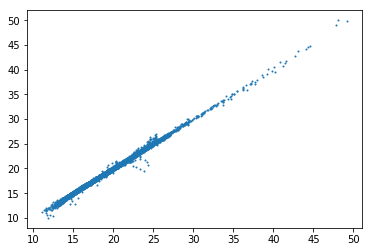

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(sess.run(hidden11,feed_dict={X: x_train, is_training:False}),y_train,s=1)

In [28]:
model_data = sess.run(hidden11, feed_dict={X: X_Data, Y: Y_Data })
model_data1 = [model_data[i][0] for i in range(len(model_data))]
model_data1

[19.908384,
 19.549536,
 19.287622,
 19.1533,
 19.152231,
 19.279861,
 19.5287,
 19.883911,
 20.31128,
 20.750057,
 21.136719,
 21.44853,
 21.67739,
 21.782804,
 21.803646,
 21.821043,
 21.823824,
 21.869534,
 21.965271,
 22.15502,
 22.334757,
 22.492622,
 22.614525,
 22.704483,
 22.777018,
 22.849422,
 22.945005,
 23.045094,
 23.140882,
 23.230694,
 23.313286,
 23.387629,
 23.453194,
 23.509327,
 23.553946,
 23.583023,
 23.592209,
 23.579927,
 23.549706,
 23.509193,
 23.466484,
 23.425686,
 23.383753,
 23.330622,
 23.254728,
 23.151346,
 23.0232,
 22.876467,
 22.71888,
 22.557884,
 22.398348,
 22.241083,
 22.083384,
 21.92089,
 21.750324,
 21.572506,
 21.392754,
 21.218468,
 21.065527,
 20.880457,
 20.756107,
 20.63118,
 20.495495,
 20.358543,
 20.222754,
 20.090736,
 19.962475,
 19.834991,
 19.705254,
 19.573776,
 19.443556,
 19.316732,
 19.193272,
 19.072433,
 18.953842,
 18.837723,
 18.724829,
 18.617115,
 18.517351,
 18.427511,
 18.347164,
 18.273615,
 18.204462,
 18.138645,
 18.0

In [30]:
after_data['ANN_Pr_t'] = model_data1
after_data['DNN_Pr_t'] = Y_Data
after_data.head()

,X,Y,Re_tau,Alpha_t_lsq,ANN_Pr_t,DNN_Pr_t
0,-5.000000e-09,-0.076720,180,0.000022,19.908384,19.012569
1,-5.000000e-09,-0.074086,180,0.000029,19.549536,19.530524
2,-5.000000e-09,-0.071392,180,0.000037,19.287622,19.954093
3,-5.000000e-09,-0.068635,180,0.000047,19.153299,20.296938
4,-5.000000e-09,-0.065814,180,0.000058,19.152231,20.572195


In [31]:
after_data.to_csv(r'D:\Desktop\190925\wedge_pr_t\results\softplus.csv',header=True,index=False)

In [19]:
Data_stat = Data.describe()
Data_stat = Data_stat.transpose()
print(Data_stat.head())
Data_stat1 = norm_Data.describe()
Data_stat1 = Data_stat1.transpose()
print(Data_stat1.head())

             count      mean       std       min       25%       50%  \
Nu_t_lsq  271950.0  0.002727  0.001812  0.000002  0.000744  0.003311   
tke       271950.0  0.007270  0.003245  0.001561  0.004451  0.006803   
tke_diss  271950.0 -0.001688  0.001240 -0.005468 -0.002992 -0.001319   
dk/dx     271950.0 -0.000013  0.001948 -0.010422 -0.000247 -0.000034   
dk/dy     271950.0 -0.000632  0.086369 -0.275915 -0.015030  0.000347   

               75%       max  
Nu_t_lsq  0.004284  0.005976  
tke       0.009933  0.015415  
tke_diss -0.000521 -0.000188  
dk/dx     0.000195  0.008786  
dk/dy     0.016286  0.320624  
             count          mean  std       min       25%       50%       75%  \
Nu_t_lsq  271950.0  1.960069e-14  1.0 -1.503612 -1.094030  0.322309  0.859040   
tke       271950.0 -4.067560e-16  1.0 -1.759090 -0.868530 -0.143738  0.820697   
tke_diss  271950.0 -7.595426e-15  1.0 -3.047437 -1.051268  0.297575  0.940935   
dk/dx     271950.0 -9.928525e-17  1.0 -5.343934 -0.120080

In [7]:
data = pd.read_csv(r'D:\Desktop\190925\Python_scripts\Data\case1_RANS_wedge_trim.csv')
data1 = pd.DataFrame()
data1['X'] = data['X']
data1['Y'] = data['Y']
del data['X']
del data['Y']
del data['Alpha_t_lsq']
del data['Re_tau']
data1['DNS_Pr_t'] = data['Pr_t']

data11 = (data - Data_stat['mean'])/Data_stat['std']
data12 = (data11 - Data_stat1['min'])/(Data_stat1['max'] - Data_stat1['min'])*(50 - 10) + 10
data12.head()

,Nu_t_lsq,tke,tke_diss,dk/dx,dk/dy,dk/dx_i,dp_dx,dp_dy,dp_dx_i,dT/dx,...,S_22,S_ij_abs,u_du/dx+v_dv/dx,MKE_diff,MKE_pre,MKE_diss,MTV_diff,MTV_diss,Pr,Pr_t
0,10.132986,14.377132,22.268086,37.114486,44.346723,39.466290,48.009760,20.425027,26.667895,25.449422,...,18.579268,27.418088,36.907974,50.000000,21.496533,42.226601,20.145804,36.800436,10.0,19.012569
1,10.185886,16.245140,22.510143,37.402969,45.271994,41.187298,47.862485,19.678991,26.818636,25.147700,...,18.593374,27.545938,37.314369,49.868454,21.114644,42.114543,21.000677,36.867342,10.0,19.530524
2,10.249500,18.250517,22.825082,37.582998,45.944272,42.437739,47.711269,18.942071,27.003289,24.887386,...,18.652764,27.582043,37.693985,49.624822,20.757066,42.082673,21.784650,36.957200,10.0,19.954093
3,10.324497,20.366414,23.175629,37.684747,46.345855,43.184686,47.554859,18.224296,27.211999,24.667237,...,18.747683,27.528010,38.045613,49.295051,20.418061,42.130238,22.499872,37.069875,10.0,20.296938
4,10.412217,22.562516,23.524736,37.727042,46.472720,43.420656,47.392680,17.532720,27.436014,24.485448,...,18.872329,27.387712,38.368020,48.902306,20.094091,42.253057,23.150194,37.204829,10.0,20.572195


In [8]:
del data12['Pr_t']

model = sess.run(hidden11,feed_dict={X: x_train,is_training:False})
model
# grad_model = sess.run(tf.squeeze(tf.gradients(hidden5,X)),feed_dict={X:data12,is_training:False})
# for i in range(len(data12.columns)):
#     globals()['grad_x{}'.format(i+1)] = [grad_model[j][i] for j in range(len(grad_model))]

array([[19.783888],
       [19.544605],
       [17.58237 ],
       ...,
       [16.194212],
       [17.635166],
       [17.721893]], dtype=float32)

In [10]:
model1 = [model[i][0] for i in range(len(model))]
model1
data12['ANN_Pr_t'] = model1
data12.head()

ValueError: Length of values does not match length of index

In [25]:
import sys
mod = sys.modules[__name__]
for i in range(len(data12.columns)):
    data1['{}'.format(data12.columns[i])] = getattr(mod,'grad_x{}'.format(i+1))
    
data1.head()

,X,Y,DNS_Pr_t,Nu_t_lsq,tke,tke_diss,dk/dx,dk/dy,dk/dx_i,dp_dx,...,S_22,S_ij_abs,u_du/dx+v_dv/dx,MKE_diff,MKE_pre,MKE_diss,MTV_diff,MTV_diss,Re_tau,Pr
0,-5.000000e-09,-0.076720,0.993037,2.350121,0.498286,-1.107374,-0.088408,-0.533132,-0.551654,2.545012,...,1.540576,1.221290,-0.554221,2.143875,1.980704,2.759040,1.291551,-2.366121,0.464251,-0.080646
1,-5.000000e-09,-0.074086,1.025760,2.330193,0.498247,-1.070832,-0.089417,-0.540665,-0.570904,2.509068,...,1.521865,1.243789,-0.535846,2.114339,1.962674,2.756478,1.274209,-2.364124,0.460535,-0.083380
2,-5.000000e-09,-0.071392,1.052520,2.316830,0.503947,-1.068320,-0.101840,-0.548055,-0.571070,2.468442,...,1.527090,1.245809,-0.547637,2.100595,1.964931,2.736974,1.263276,-2.328565,0.464069,-0.082057
3,-5.000000e-09,-0.068635,1.074180,2.332357,0.539766,-1.090985,-0.122386,-0.472117,-0.594500,2.424022,...,1.505123,1.228186,-0.535763,2.045291,1.964294,2.640466,1.246901,-2.240331,0.474957,-0.081571
4,-5.000000e-09,-0.065814,1.091570,2.418782,0.663382,-1.171814,-0.166174,-0.165377,-0.685028,2.351002,...,1.396686,1.157015,-0.458912,1.869473,1.955989,2.329468,1.208006,-2.000580,0.507439,-0.079922


In [26]:
data1.to_csv(r'D:\Desktop\190925\wedge_pr_t\csv_file\grad_0098_case1_RANS_wedge.csv',header=True,index=False)

In [ ]:
testset_pr_t = sess.run(hidden11, feed_dict={X: x_test, is_training:False})
testset_pr_t = [testset_pr_t[i][0] for i in range(len(testset_pr_t))]
testset_pr_t = [(testset_pr_t[i]-10)/40*(norm_Data['Pr_t'].max()-norm_Data['Pr_t'].min())+norm_Data['Pr_t'].min() for i in range(len(testset_pr_t))]
testset_pr_t = [testset_pr_t[i]*Data['Pr_t'].std()+Data['Pr_t'].mean() for i in range(len(testset_pr_t))]

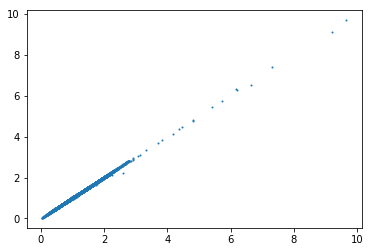

In [41]:
testset_pr_t_real = [y_test[i][0] for i in range(len(y_test))]
# testset_pr_t_real
testset_pr_t_real = [((testset_pr_t_real[i]-10)/40*(norm_Data['Pr_t'].max()-norm_Data['Pr_t'].min())+norm_Data['Pr_t'].min()) for i in range(len(testset_pr_t_real))]
testset_pr_t_real = [(testset_pr_t_real[i]*Data['Pr_t'].std()+Data['Pr_t'].mean()) for i in range(len(testset_pr_t_real))]

plt.scatter(testset_pr_t,testset_pr_t_real,s=1)

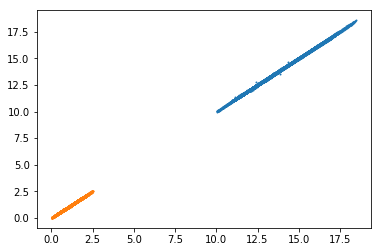

In [67]:
case9_Data = pd.read_csv(r'/home/ftmlab/다운로드/HaKang/case9_total_uniform_wedge.csv')

contour_data = pd.DataFrame()
contour_data['X'] = case9_Data['X']
contour_data['Y'] = case9_Data['Y']
contour_data['Alpha_t'] = case9_Data['Alpha_t']

del case9_Data['X']
del case9_Data['Y']
del case9_Data['y_plus']
del case9_Data['wedge_height']
del case9_Data['Alpha_t']

preprocess_case9_Data = ((case9_Data - Data.mean())/Data.std())
preprocess_case9_Data = (preprocess_case9_Data - norm_Data.min())/(norm_Data.max() - norm_Data.min())*40 + 10

case9_X = preprocess_case9_Data[preprocess_case9_Data.columns[:-1]]
case9_Y = preprocess_case9_Data[preprocess_case9_Data.columns[-1:]]

plt.scatter(sess.run(hidden11,feed_dict={X: case9_X,is_training:False}),case9_Y,s=1)
# plt.axis([-2.5,15,-2.5,15])

case9_pr_t = sess.run(hidden11, feed_dict={X: case9_X, is_training:False})
case9_pr_t = [case9_pr_t[i][0] for i in range(len(case9_pr_t))]
case9_pr_t = [(case9_pr_t[i]-10)/40*(norm_Data['Pr_t'].max()-norm_Data['Pr_t'].min())+norm_Data['Pr_t'].min() for i in range(len(case9_pr_t))]
case9_pr_t = [case9_pr_t[i]*Data['Pr_t'].std()+Data['Pr_t'].mean() for i in range(len(case9_pr_t))]

# case2_pr_t_real = case2_Y
case9_pr_t_real = ((case9_Y-10)/40*(norm_Data['Pr_t'].max()-norm_Data['Pr_t'].min())+norm_Data['Pr_t'].min())*Data['Pr_t'].std()+Data['Pr_t'].mean()
# caes2_pr_t_real = case2_pr_t_real*Data['Pr_t'].std()+Data['Pr_t'].mean()

plt.scatter(case9_pr_t, case9_pr_t_real, s=1)

contour_data['ANN_pr_t'] = case9_pr_t
contour_data['DNS_pr_t'] = case9_Data['Pr_t']
contour_data['nu_t'] = case9_Data['Nu_t_lsq']
contour_data.to_csv(r'./case9_wedge_contour.csv',header=True,index=False)

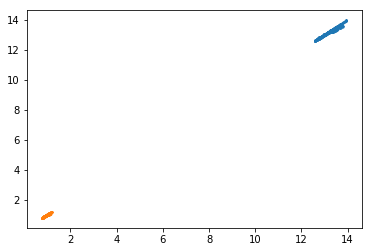

In [57]:
case10_Data = pd.read_csv(r'/home/ftmlab/다운로드/HaKang/0D_mean_orig_channel.csv')

contour_data = pd.DataFrame()
contour_data['X'] = case10_Data['X']
contour_data['Y'] = case10_Data['Y']
contour_data['Alpha_t'] = case10_Data['Alpha_t']
contour_data['Re'] = case10_Data['Re']
contour_data['Pr'] = case10_Data['Pr']

del case10_Data['X']
del case10_Data['Y']
del case10_Data['y_plus']
del case10_Data['wedge_height']
del case10_Data['Alpha_t']

preprocess_case10_Data = ((case10_Data - Data.mean())/Data.std())
preprocess_case10_Data = (preprocess_case10_Data - norm_Data.min())/(norm_Data.max() - norm_Data.min())*40 + 10

case10_X = preprocess_case10_Data[preprocess_case10_Data.columns[:-1]]
case10_Y = preprocess_case10_Data[preprocess_case10_Data.columns[-1:]]

plt.scatter(sess.run(hidden11,feed_dict={X: case10_X,is_training:False}),case10_Y,s=1)
# plt.axis([-2.5,15,-2.5,15])

case10_pr_t = sess.run(hidden11, feed_dict={X: case10_X, is_training:False})
case10_pr_t = [case10_pr_t[i][0] for i in range(len(case10_pr_t))]
case10_pr_t = [(case10_pr_t[i]-10)/40*(norm_Data['Pr_t'].max()-norm_Data['Pr_t'].min())+norm_Data['Pr_t'].min() for i in range(len(case10_pr_t))]
case10_pr_t = [case10_pr_t[i]*Data['Pr_t'].std()+Data['Pr_t'].mean() for i in range(len(case10_pr_t))]

# case2_pr_t_real = case2_Y
case10_pr_t_real = ((case10_Y-10)/40*(norm_Data['Pr_t'].max()-norm_Data['Pr_t'].min())+norm_Data['Pr_t'].min())*Data['Pr_t'].std()+Data['Pr_t'].mean()
# caes2_pr_t_real = case2_pr_t_real*Data['Pr_t'].std()+Data['Pr_t'].mean()

plt.scatter(case10_pr_t, case10_pr_t_real, s=1)

contour_data['ANN_pr_t'] = case10_pr_t
contour_data['DNS_pr_t'] = case10_Data['Pr_t']
contour_data['nu_t'] = case10_Data['Nu_t_lsq']
contour_data.to_csv(r'./case10_wedge_contour.csv',header=True,index=False)

[-2, 6, -2, 6]

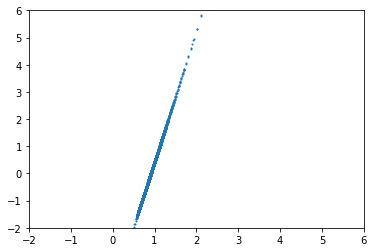

In [44]:
plt.scatter(case2_pr_t, case2_pr_t_real, s=1)
plt.axis([-2,6,-2,6])

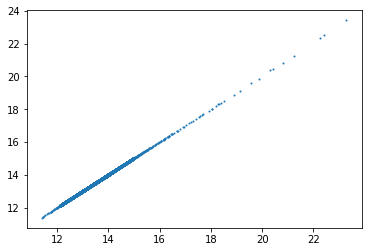

In [30]:
case1_Data = pd.read_csv(r'/home/ftmlab/다운로드/HaKang/case1_total_uniform_wedge.csv')

contour_data = pd.DataFrame()
contour_data['X'] = case1_Data['X']
contour_data['Y'] = case1_Data['Y']
contour_data['Alpha_t'] = case1_Data['Alpha_t']

del case1_Data['X']
del case1_Data['Y']
del case1_Data['y_plus']
del case1_Data['wedge_height']
del case1_Data['Alpha_t']

preprocess_case1_Data = ((case1_Data - Data.mean())/Data.std())
preprocess_case1_Data = (preprocess_case1_Data - norm_Data.min())/(norm_Data.max() - norm_Data.min())*40 + 10

case1_X = preprocess_case1_Data[preprocess_case1_Data.columns[:-1]]
case1_Y = preprocess_case1_Data[preprocess_case1_Data.columns[-1:]]

plt.scatter(sess.run(hidden11,feed_dict={X: case1_X,is_training:False}),case1_Y,s=1)
# plt.axis([-2.5,15,-2.5,15])

In [ ]:
case1_pr_t = sess.run(hidden11, feed_dict={X: case1_X, is_training:False})
case1_pr_t = [case1_pr_t[i][0] for i in range(len(case1_pr_t))]
case1_pr_t = [(case1_pr_t[i]-10)/40*(norm_Data['Pr_t'].max()-norm_Data['Pr_t'].min())+norm_Data['Pr_t'].min() for i in range(len(case1_pr_t))]
case1_pr_t = [case1_pr_t[i]*Data['Pr_t'].std()+Data['Pr_t'].mean() for i in range(len(case1_pr_t))]

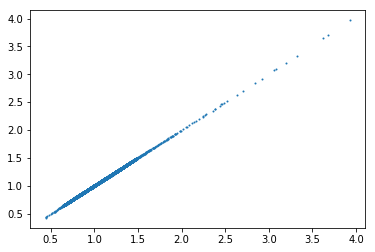

In [53]:
# case1_pr_t_real = case1_Y
case1_pr_t_real_norm = ((case1_Y-10)/40*(norm_Data['Pr_t'].max()-norm_Data['Pr_t'].min())+norm_Data['Pr_t'].min())*Data['Pr_t'].std()+Data['Pr_t'].mean()
# caes1_pr_t_real = case1_pr_t_real_norm*Data['Pr_t'].std()+Data['Pr_t'].mean()

plt.scatter(case1_pr_t, case1_pr_t_real_norm, s=1)

In [52]:
case1_pr_t_real_norm

0         0.478256
1         0.774759
2         0.955058
3         1.066099
4         1.139431
5         1.193767
6         1.239245
7         1.280743
8         1.320299
9         1.358528
10        1.395432
11        1.430771
12        1.464737
13        1.497472
14        1.529448
15        1.560950
16        1.591979
17        1.622345
18        1.651432
19        1.678529
20        1.702167
21        1.721211
22        1.734902
23        1.742813
24        1.745039
25        1.742150
26        1.734665
27        1.722632
28        1.706099
29        1.685019
            ...   
179897    1.388610
179898    1.372030
179899    1.352370
179900    1.328921
179901    1.301066
179902    1.268284
179903    1.230481
179904    1.187893
179905    1.141184
179906    1.091112
179907    1.038623
179908    0.984950
179909    0.931183
179910    0.878362
179911    0.827579
179912    0.778833
179913    0.732361
179914    0.688399
179915    0.647185
179916    0.610046
179917    0.577785
179918    0.

In [32]:
contour_data['ANN_pr_t'] = case1_pr_t
contour_data

,X,Y,Alpha_t,ANN_pr_t
0,-5.000000e-09,-0.075792,0.000024,1.002857
1,-5.000000e-09,-0.069741,0.000042,1.064503
2,-5.000000e-09,-0.063689,0.000066,1.103554
3,-5.000000e-09,-0.057637,0.000096,1.128479
4,-5.000000e-09,-0.051585,0.000132,1.144655
5,-5.000000e-09,-0.045533,0.000174,1.156056
6,-5.000000e-09,-0.039481,0.000223,1.165191
7,-5.000000e-09,-0.033429,0.000276,1.173371
8,-5.000000e-09,-0.027377,0.000336,1.182186
9,-5.000000e-09,-0.021326,0.000400,1.192481


In [33]:
contour_data['DNS_pr_t'] = case1_Data['Pr_t']
contour_data['nu_t'] = case1_Data['Nu_t_lsq']
contour_data.to_csv(r'./case1_wedge_contour.csv',header=True,index=False)

In [22]:
for i in range(9):
    globals()['Data{}'.format(i+1)] = pd.read_csv(r'/home/ftmlab/다운로드/HaKang/case%d_total_uniform_wedge.csv'%(i+1))
Data10 = pd.read_csv(r'/home/ftmlab/다운로드/HaKang/0D_mean_orig_channel.csv')

Data = pd.concat([Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8,Data9,Data10])

Pr_t_max = Data['Pr_t'].max()
Pr_t_min = Data['Pr_t'].min()
Pr_t_mean = Data['Pr_t'].mean()
Pr_t_std = Data['Pr_t'].std()

# aa = sess.run(hidden11,feed_dict={X: x_test,is_training:False})
# aaa = [aa[i][0]*Pr_t_std + Pr_t_mean for i in range(len(aa))]
# aaa
# bb = y_test
# bbb = [bb[i][0]*Pr_t_std + Pr_t_mean for i in range(len(bb))]

# plt.scatter(aaa,bbb,s=1)
print(Pr_t_max)
print(Pr_t_min)

11.7732
0.0219149


In [ ]:
nu_t_test = Data['Nu_t_lsq'].iloc[test_index]
alpha_model_test = nu_t_test/aaa
alpha_DNS_test = nu_t_test/bbb

plt.scatter(alpha_model_test,alpha_DNS_test,s=1)
plt.axis([-0.0005,0.002,-0.0005,0.002])

In [ ]:
cc = abs(alpha_model_test - alpha_DNS_test)/alpha_DNS_test*100
print('max relative error:',max(cc))
print('min relative error:',min(cc))

In [ ]:
for i in range(9):
    globals()['Data{}'.format(i+1)] = pd.read_csv(r'/home/ftmlab/다운로드/HaKang/case%d_total_uniform_wedge.csv'%(i+1))
Data10 = pd.read_csv(r'/home/ftmlab/다운로드/HaKang/0D_mean_orig_channel.csv')

print(Data1.columns)
print(Data10.columns)

In [ ]:
len(Data1.columns)

In [ ]:
len(Data10.columns)

In [2]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import math
import numpy as np
from sklearn import utils
from functools import partial
tf.set_random_seed(777)

sess = tf.Session()
saver = tf.train.Saver()
saver.restore(sess,"./wedge_flat_model.ckpt")

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./wedge_flat_model.ckpt


NotFoundError: Restoring from checkpoint failed. This is most likely due to a Variable name or other graph key that is missing from the checkpoint. Please ensure that you have not altered the graph expected based on the checkpoint. Original error:

Key dense_5/bias not found in checkpoint
	 [[node save/RestoreV2 (defined at <ipython-input-2-edfb9fff83d6>:11) ]]
	 [[node save/RestoreV2 (defined at <ipython-input-2-edfb9fff83d6>:11) ]]

Caused by op 'save/RestoreV2', defined at:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/ftmlab/.local/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/ftmlab/.local/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/ftmlab/.local/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/home/ftmlab/.local/lib/python3.5/site-packages/tornado/platform/asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.5/asyncio/base_events.py", line 345, in run_forever
    self._run_once()
  File "/usr/lib/python3.5/asyncio/base_events.py", line 1312, in _run_once
    handle._run()
  File "/usr/lib/python3.5/asyncio/events.py", line 125, in _run
    self._callback(*self._args)
  File "/home/ftmlab/.local/lib/python3.5/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/home/ftmlab/.local/lib/python3.5/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/home/ftmlab/.local/lib/python3.5/site-packages/tornado/gen.py", line 781, in inner
    self.run()
  File "/home/ftmlab/.local/lib/python3.5/site-packages/tornado/gen.py", line 742, in run
    yielded = self.gen.send(value)
  File "/home/ftmlab/.local/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/home/ftmlab/.local/lib/python3.5/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/ftmlab/.local/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/ftmlab/.local/lib/python3.5/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/ftmlab/.local/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/home/ftmlab/.local/lib/python3.5/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/ftmlab/.local/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/ftmlab/.local/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/ftmlab/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2843, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/ftmlab/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2869, in _run_cell
    return runner(coro)
  File "/home/ftmlab/.local/lib/python3.5/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/home/ftmlab/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 3044, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/ftmlab/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 3209, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/home/ftmlab/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 3291, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-2-edfb9fff83d6>", line 11, in <module>
    saver = tf.train.Saver()
  File "/home/ftmlab/다운로드/tensorflow/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 832, in __init__
    self.build()
  File "/home/ftmlab/다운로드/tensorflow/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 844, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "/home/ftmlab/다운로드/tensorflow/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 881, in _build
    build_save=build_save, build_restore=build_restore)
  File "/home/ftmlab/다운로드/tensorflow/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 513, in _build_internal
    restore_sequentially, reshape)
  File "/home/ftmlab/다운로드/tensorflow/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 332, in _AddRestoreOps
    restore_sequentially)
  File "/home/ftmlab/다운로드/tensorflow/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 580, in bulk_restore
    return io_ops.restore_v2(filename_tensor, names, slices, dtypes)
  File "/home/ftmlab/다운로드/tensorflow/lib/python3.5/site-packages/tensorflow/python/ops/gen_io_ops.py", line 1572, in restore_v2
    name=name)
  File "/home/ftmlab/다운로드/tensorflow/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "/home/ftmlab/다운로드/tensorflow/lib/python3.5/site-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/home/ftmlab/다운로드/tensorflow/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 3300, in create_op
    op_def=op_def)
  File "/home/ftmlab/다운로드/tensorflow/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1801, in __init__
    self._traceback = tf_stack.extract_stack()

NotFoundError (see above for traceback): Restoring from checkpoint failed. This is most likely due to a Variable name or other graph key that is missing from the checkpoint. Please ensure that you have not altered the graph expected based on the checkpoint. Original error:

Key dense_5/bias not found in checkpoint
	 [[node save/RestoreV2 (defined at <ipython-input-2-edfb9fff83d6>:11) ]]
	 [[node save/RestoreV2 (defined at <ipython-input-2-edfb9fff83d6>:11) ]]


In [23]:
Data.mean()

X                       4.214498e+00
Y                       9.989130e-01
y_plus                  1.423812e+02
wedge_height            9.989324e-02
Nu_t_lsq                3.301367e-03
Alpha_t                 3.715701e-03
tke                     5.668334e-03
dk/dx                  -2.327634e-05
dk/dy                  -1.205200e-04
dk/dx_i_abs             2.409174e-02
tke_diss               -1.109727e-03
TV_prod(al_t_1)         3.916107e-04
tke_prod(nu_t_1_new)    1.333905e-03
Rp                      3.497205e+00
Rd                      3.730394e+00
TV                      3.226160e-03
tke_sdm                -6.182514e-06
tke_conv_turb          -3.970063e-05
tke_pre                -2.377277e-06
tke_diff               -7.663247e-05
TV_sdm                  1.602093e-07
TV_conv_turb            1.587612e-06
TV_diff                -8.432491e-06
TV_diss                -3.085193e-04
dp/dx                  -3.994744e-04
dp/dy                  -2.746078e-04
dp/dx_i_abs             2.153266e-02
u

In [24]:
Data.std()

X                         3.039029
Y                         0.638445
y_plus                  112.304408
wedge_height              0.003266
Nu_t_lsq                  0.001458
Alpha_t                   0.001495
tke                       0.002721
dk/dx                     0.002780
dk/dy                     0.068448
dk/dx_i_abs               0.064239
tke_diss                  0.001356
TV_prod(al_t_1)           0.000301
tke_prod(nu_t_1_new)      0.002187
Rp                        5.681268
Rd                        4.813051
TV                        0.001430
tke_sdm                   0.000419
tke_conv_turb             0.000624
tke_pre                   0.000165
tke_diff                  0.000521
TV_sdm                    0.000032
TV_conv_turb              0.000080
TV_diff                   0.000092
TV_diss                   0.000217
dp/dx                     0.020746
dp/dy                     0.017271
dp/dx_i_abs               0.016311
u_du/dx+v_dv/dx           0.033765
MKE_pre             

In [35]:
saver = tf.train.Saver()
saver.save(sess,"./wedge_flat_model.ckpt")

'./wedge_flat_model.ckpt'

In [4]:
import tensorflow as tf

sess = tf.Session()
saver = tf.train.import_meta_graph('wedge_flat_model.ckpt.meta')
# saver.restore(sess, tf.train.latest_checkpoint('./'))


In [19]:
# sess.run(tf.global_variables_initializer())
# sess.run(tf.local_variables_initializer())

save_file = './wedge_flat_model.ckpt'

# sess = tf.Session()
#     new_saver = tf.train.import_meta_graph('wedge_flat_model.ckpt.meta')
saver.restore(sess, save_file)

INFO:tensorflow:Restoring parameters from ./wedge_flat_model.ckpt


In [12]:
# import pandas as pd
# import tensorflow as tf
# from sklearn.model_selection import train_test_split
# import math
# import numpy as np
# from sklearn import utils
# from functools import partial
# tf.set_random_seed(777)

# def norm(Data):
    
#     return ((Data - Data.mean())/Data.std())

# def preprocess(Data,max_norm=50,min_norm=10):
#     #normalization
#     Data = (Data - Data.min())/(Data.max() - Data.min())*(max_norm - min_norm) + min_norm
#     # for i in range(len(Data.columns)):
#     #     Data[Data.columns[i]] = (Data[Data.columns[i]] - Data[Data.columns[i]].mean())/Data[Data.columns[i]].std()
#     #     print('standardized')
#     #standardization
#     #for i in range(len(Data.columns)):
#     #    if Data[Data.columns[i]].std()*3 > (Data[Data.columns[i]].max()-Data[Data.columns[i]].min()):
#     #        Data[Data.columns[i]] = (Data[Data.columns[i]] - Data[Data.columns[i]].mean())/Data[Data.columns[i]].std()
#     #        print('standardized %d'%i)
#     #    else:
#     #        Data = (Data - Data.min())/(Data.max() - Data.min())*(max_norm - min_norm) + min_norm
#     return Data

# for i in range(9):
#     globals()['Data{}'.format(i+1)] = pd.read_csv(r'/home/ftmlab/다운로드/HaKang/case%d_total_uniform_wedge.csv'%(i+1))
# Data10 = pd.read_csv(r'/home/ftmlab/다운로드/HaKang/0D_mean_orig_channel.csv')

# Data = pd.concat([Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8,Data9,Data10])

# del Data['X']
# del Data['Y']
# del Data['y_plus']
# del Data['wedge_height']
# del Data['Alpha_t']
# # del Data['Pr']
# # del Data['Re']

# # Data = pd.DataFrame()
# # Data['dk_dx_i_abs'] = data['dk_dx_i_abs']
# # Data['dT/dx'] = data['dT/dx']
# # Data['dT/dy'] = data['dT/dy']
# # # Data['Nu_t_lsq_n'] = data['Nu_t_lsq_n']
# # Data['PHI-Alpha_t_lsq_n'] = data['PHI-Alpha_t_lsq_n']
# # # Data['PHI-Pr_t_new'] = data['PHI-Pr_t_new']

# denorm_min = Data['Pr_t'].min()
# denorm_max = Data['Pr_t'].max()

# norm_Data = norm(Data)
# pre_Data = preprocess(norm_Data)

# aa = sess.run(tf.gradients(hidden11,X),feed_dict={X:pre_Data[pre_Data.columns[:-1]]})
bb = sess.run()

FailedPreconditionError: Attempting to use uninitialized value dense/kernel_2
	 [[node dense/kernel_2/read (defined at <ipython-input-8-530169cb3fcc>:107) ]]
	 [[node gradients_2/dense/MatMul_2_grad/MatMul (defined at <ipython-input-12-674bf1e66930>:57) ]]

Caused by op 'dense/kernel_2/read', defined at:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/ftmlab/.local/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/ftmlab/.local/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/ftmlab/.local/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/home/ftmlab/.local/lib/python3.5/site-packages/tornado/platform/asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.5/asyncio/base_events.py", line 345, in run_forever
    self._run_once()
  File "/usr/lib/python3.5/asyncio/base_events.py", line 1312, in _run_once
    handle._run()
  File "/usr/lib/python3.5/asyncio/events.py", line 125, in _run
    self._callback(*self._args)
  File "/home/ftmlab/.local/lib/python3.5/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/home/ftmlab/.local/lib/python3.5/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/home/ftmlab/.local/lib/python3.5/site-packages/tornado/gen.py", line 781, in inner
    self.run()
  File "/home/ftmlab/.local/lib/python3.5/site-packages/tornado/gen.py", line 742, in run
    yielded = self.gen.send(value)
  File "/home/ftmlab/.local/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/home/ftmlab/.local/lib/python3.5/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/ftmlab/.local/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/ftmlab/.local/lib/python3.5/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/ftmlab/.local/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/home/ftmlab/.local/lib/python3.5/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/ftmlab/.local/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/ftmlab/.local/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/ftmlab/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2843, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/ftmlab/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2869, in _run_cell
    return runner(coro)
  File "/home/ftmlab/.local/lib/python3.5/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/home/ftmlab/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 3044, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/ftmlab/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 3209, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/home/ftmlab/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 3291, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-530169cb3fcc>", line 107, in <module>
    hidden1 = dense_layer(X,32)
  File "/home/ftmlab/다운로드/tensorflow/lib/python3.5/site-packages/tensorflow/python/util/deprecation.py", line 324, in new_func
    return func(*args, **kwargs)
  File "/home/ftmlab/다운로드/tensorflow/lib/python3.5/site-packages/tensorflow/python/layers/core.py", line 188, in dense
    return layer.apply(inputs)
  File "/home/ftmlab/다운로드/tensorflow/lib/python3.5/site-packages/tensorflow/python/keras/engine/base_layer.py", line 1227, in apply
    return self.__call__(inputs, *args, **kwargs)
  File "/home/ftmlab/다운로드/tensorflow/lib/python3.5/site-packages/tensorflow/python/layers/base.py", line 530, in __call__
    outputs = super(Layer, self).__call__(inputs, *args, **kwargs)
  File "/home/ftmlab/다운로드/tensorflow/lib/python3.5/site-packages/tensorflow/python/keras/engine/base_layer.py", line 538, in __call__
    self._maybe_build(inputs)
  File "/home/ftmlab/다운로드/tensorflow/lib/python3.5/site-packages/tensorflow/python/keras/engine/base_layer.py", line 1603, in _maybe_build
    self.build(input_shapes)
  File "/home/ftmlab/다운로드/tensorflow/lib/python3.5/site-packages/tensorflow/python/keras/layers/core.py", line 949, in build
    trainable=True)
  File "/home/ftmlab/다운로드/tensorflow/lib/python3.5/site-packages/tensorflow/python/layers/base.py", line 435, in add_weight
    getter=vs.get_variable)
  File "/home/ftmlab/다운로드/tensorflow/lib/python3.5/site-packages/tensorflow/python/keras/engine/base_layer.py", line 349, in add_weight
    aggregation=aggregation)
  File "/home/ftmlab/다운로드/tensorflow/lib/python3.5/site-packages/tensorflow/python/training/checkpointable/base.py", line 607, in _add_variable_with_custom_getter
    **kwargs_for_getter)
  File "/home/ftmlab/다운로드/tensorflow/lib/python3.5/site-packages/tensorflow/python/ops/variable_scope.py", line 1479, in get_variable
    aggregation=aggregation)
  File "/home/ftmlab/다운로드/tensorflow/lib/python3.5/site-packages/tensorflow/python/ops/variable_scope.py", line 1220, in get_variable
    aggregation=aggregation)
  File "/home/ftmlab/다운로드/tensorflow/lib/python3.5/site-packages/tensorflow/python/ops/variable_scope.py", line 547, in get_variable
    aggregation=aggregation)
  File "/home/ftmlab/다운로드/tensorflow/lib/python3.5/site-packages/tensorflow/python/ops/variable_scope.py", line 499, in _true_getter
    aggregation=aggregation)
  File "/home/ftmlab/다운로드/tensorflow/lib/python3.5/site-packages/tensorflow/python/ops/variable_scope.py", line 911, in _get_single_variable
    aggregation=aggregation)
  File "/home/ftmlab/다운로드/tensorflow/lib/python3.5/site-packages/tensorflow/python/ops/variables.py", line 213, in __call__
    return cls._variable_v1_call(*args, **kwargs)
  File "/home/ftmlab/다운로드/tensorflow/lib/python3.5/site-packages/tensorflow/python/ops/variables.py", line 176, in _variable_v1_call
    aggregation=aggregation)
  File "/home/ftmlab/다운로드/tensorflow/lib/python3.5/site-packages/tensorflow/python/ops/variables.py", line 155, in <lambda>
    previous_getter = lambda **kwargs: default_variable_creator(None, **kwargs)
  File "/home/ftmlab/다운로드/tensorflow/lib/python3.5/site-packages/tensorflow/python/ops/variable_scope.py", line 2495, in default_variable_creator
    expected_shape=expected_shape, import_scope=import_scope)
  File "/home/ftmlab/다운로드/tensorflow/lib/python3.5/site-packages/tensorflow/python/ops/variables.py", line 217, in __call__
    return super(VariableMetaclass, cls).__call__(*args, **kwargs)
  File "/home/ftmlab/다운로드/tensorflow/lib/python3.5/site-packages/tensorflow/python/ops/variables.py", line 1395, in __init__
    constraint=constraint)
  File "/home/ftmlab/다운로드/tensorflow/lib/python3.5/site-packages/tensorflow/python/ops/variables.py", line 1557, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "/home/ftmlab/다운로드/tensorflow/lib/python3.5/site-packages/tensorflow/python/util/dispatch.py", line 180, in wrapper
    return target(*args, **kwargs)
  File "/home/ftmlab/다운로드/tensorflow/lib/python3.5/site-packages/tensorflow/python/ops/array_ops.py", line 81, in identity
    ret = gen_array_ops.identity(input, name=name)
  File "/home/ftmlab/다운로드/tensorflow/lib/python3.5/site-packages/tensorflow/python/ops/gen_array_ops.py", line 3890, in identity
    "Identity", input=input, name=name)
  File "/home/ftmlab/다운로드/tensorflow/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "/home/ftmlab/다운로드/tensorflow/lib/python3.5/site-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/home/ftmlab/다운로드/tensorflow/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 3300, in create_op
    op_def=op_def)
  File "/home/ftmlab/다운로드/tensorflow/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1801, in __init__
    self._traceback = tf_stack.extract_stack()

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value dense/kernel_2
	 [[node dense/kernel_2/read (defined at <ipython-input-8-530169cb3fcc>:107) ]]
	 [[node gradients_2/dense/MatMul_2_grad/MatMul (defined at <ipython-input-12-674bf1e66930>:57) ]]


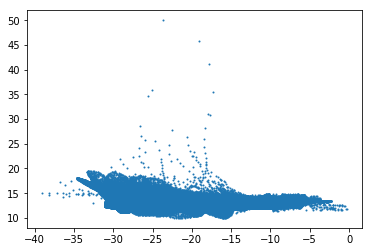

In [20]:
# init = tf.initialize_all_variables()
# sess.run(init)
# import matplotlib.pyplot as plt
# %matplotlib inline
plt.scatter(sess.run(hidden11,feed_dict={X: x_train,is_training:False}),y_train,s=1)

In [1]:
import pandas as pd
Data = pd.read_csv(r'D:\Desktop\190305\csvfile\new\새 폴더 (3)\0D_mean_orig_channel.csv')
Data.columns

Index(['X', 'Y', 'y_plus', 'wedge_height', 'Nu_t_lsq', 'Alpha_t', 'tke',
       'dk/dx', 'dk/dy', 'dk/dx_i_abs', 'tke_diss', 'TV_prod(al_t_1)',
       'tke_prod(nu_t_1_new)', 'Rp', 'Rd', 'TV', 'tke_sdm', 'tke_conv_turb',
       'tke_pre', 'tke_diff', 'TV_sdm', 'TV_conv_turb', 'TV_diff', 'TV_diss',
       'dp/dx', 'dp/dy', 'dp/dx_i_abs', 'u_du/dx+v_dv/dx', 'MKE_pre',
       'MKE_diss', 'MKE_visc_diff', 'MTV_diss', 'MTV_mol_diff', 'dT/dx',
       'dT/dy', 'dT/dx_i_abs', 'S_ij_abs', 'S_11', 'S_12(=S_21)', 'S_22', 'Re',
       'Pr', 'dTvar/dx_i_abs', 'Rp/Rd', 'U-AVG-X', 'U-AVG-Y', 'U-AVG-Z',
       'du/dx', 'du/dy', 'dv/dx', 'dv/dy', 'P_AVG', 'Pr_t'],
      dtype='object')

In [2]:
data1 = pd.read_csv(r'D:\Desktop\190925\wedge_pr_t\csv_file\RANS_wedge_Re180_Pr02.csv')
data1.columns

Index(['Nu_t_lsq', 'tke', 'tke_diss', 'dk/dx', 'dk/dy', 'dk/dx_i', 'dp_dx',
       'dp_dy', 'dp_dx_i', 'dT/dx', 'dT/dy', 'dT/dx_i', 'S_11', 'S_12', 'S_22',
       'S_ij_abs', 'u_du/dx+v_dv/dx', 'MKE_diff', 'MKE_pre', 'MKE_diss',
       'MTV_diff', 'MTV_diss', 'Re_tau', 'Pr', 'Pr_t', 'X', 'Y',
       'Alpha_t_lsq'],
      dtype='object')

In [3]:
Data.rename(columns={'dk/dx_i_abs':'dk/dx_i','dp/dx':'dp_dx','dp/dy':'dp_dy','dp/dx_i_abs':'dp_dx_i',
                     'dT/dx_i_abs':'dT/dx_i','S_12(=S_21)':'S_12','MKE_visc_diff':'MKE_diff',
                     'MTV_mol_diff':'MTV_diff','Re':'Re_tau','Alpha_t':'Alpha_t_lsq'},inplace=True)
data = pd.DataFrame(Data,columns=data1.columns)
data.head()

,Nu_t_lsq,tke,tke_diss,dk/dx,dk/dy,dk/dx_i,dp_dx,dp_dy,dp_dx_i,dT/dx,...,MKE_pre,MKE_diss,MTV_diff,MTV_diss,Re_tau,Pr,Pr_t,X,Y,Alpha_t_lsq
0,0.000005,0.002493,-0.014934,0.000218,0.004311,0.659227,-0.000017,0.000017,0.009884,0.000001,...,0.000011,-642.0495,-0.004652,-11.75585,590,0.2,1.077835,0,0.006114,0.000004
1,0.000005,0.002493,-0.014934,0.000218,0.004311,0.659227,-0.000017,0.000017,0.009884,0.000007,...,0.000011,-642.0495,-0.031497,-69.59485,590,0.7,1.030240,0,0.006114,0.000004
2,0.000005,0.002493,-0.014934,0.000218,0.004311,0.659227,-0.000017,0.000017,0.009884,0.000019,...,0.000011,-642.0495,-0.120045,-236.00250,590,2.0,1.026915,0,0.006114,0.000004
3,0.000007,0.003223,-0.014070,0.000062,0.004664,0.683528,-0.000017,0.000022,0.012773,0.000002,...,0.000014,-604.7260,-0.005351,-11.62130,590,0.2,1.076085,0,0.007173,0.000007
4,0.000007,0.003223,-0.014070,0.000062,0.004664,0.683528,-0.000017,0.000022,0.012773,0.000009,...,0.000014,-604.7260,-0.035687,-66.80715,590,0.7,1.023545,0,0.007173,0.000007


In [4]:
data.to_csv(r'D:\Desktop\190925\wedge_pr_t\csv_file\RANS_flat.csv',header=True,index=False)

In [8]:
len(Data.columns)

25

In [27]:
Data10 = pd.read_csv(r'D:\Desktop\190925\wedge_pr_t\csv_file\RANS_flat.csv')
Data10['Re_tau'] = Data10['Re_tau']/1000
Data10.head()

,Nu_t_lsq,tke,tke_diss,dk/dx,dk/dy,dk/dx_i,dp_dx,dp_dy,dp_dx_i,dT/dx,...,MKE_pre,MKE_diss,MTV_diff,MTV_diss,Re_tau,Pr,Pr_t,X,Y,Alpha_t_lsq
0,0.000005,0.002493,-0.014934,0.000218,0.004311,0.659227,-0.000017,0.000017,0.009884,0.000001,...,0.000011,-642.0495,-0.004652,-11.75585,0.59,0.2,1.077835,0,0.006114,0.000004
1,0.000005,0.002493,-0.014934,0.000218,0.004311,0.659227,-0.000017,0.000017,0.009884,0.000007,...,0.000011,-642.0495,-0.031497,-69.59485,0.59,0.7,1.030240,0,0.006114,0.000004
2,0.000005,0.002493,-0.014934,0.000218,0.004311,0.659227,-0.000017,0.000017,0.009884,0.000019,...,0.000011,-642.0495,-0.120045,-236.00250,0.59,2.0,1.026915,0,0.006114,0.000004
3,0.000007,0.003223,-0.014070,0.000062,0.004664,0.683528,-0.000017,0.000022,0.012773,0.000002,...,0.000014,-604.7260,-0.005351,-11.62130,0.59,0.2,1.076085,0,0.007173,0.000007
4,0.000007,0.003223,-0.014070,0.000062,0.004664,0.683528,-0.000017,0.000022,0.012773,0.000009,...,0.000014,-604.7260,-0.035687,-66.80715,0.59,0.7,1.023545,0,0.007173,0.000007


In [11]:
data12.head()

,Nu_t_lsq,tke,tke_diss,dk/dx,dk/dy,dk/dx_i,dp_dx,dp_dy,dp_dx_i,dT/dx,...,S_12,S_22,S_ij_abs,u_du/dx+v_dv/dx,MKE_diff,MKE_pre,MKE_diss,MTV_diff,MTV_diss,Pr
0,10.132986,14.377132,22.268086,37.114486,44.346723,39.466290,48.009760,20.425027,26.667895,25.449422,...,37.441323,18.579268,27.418088,36.907974,50.000000,21.496533,42.226601,20.145804,36.800436,10.0
1,10.185886,16.245140,22.510143,37.402969,45.271994,41.187298,47.862485,19.678991,26.818636,25.147700,...,37.512448,18.593374,27.545938,37.314369,49.868454,21.114644,42.114543,21.000677,36.867342,10.0
2,10.249500,18.250517,22.825082,37.582998,45.944272,42.437739,47.711269,18.942071,27.003289,24.887386,...,37.532589,18.652764,27.582043,37.693985,49.624822,20.757066,42.082673,21.784650,36.957200,10.0
3,10.324497,20.366414,23.175629,37.684747,46.345855,43.184686,47.554859,18.224296,27.211999,24.667237,...,37.502653,18.747683,27.528010,38.045613,49.295051,20.418061,42.130238,22.499872,37.069875,10.0
4,10.412217,22.562516,23.524736,37.727042,46.472720,43.420656,47.392680,17.532720,27.436014,24.485448,...,37.424750,18.872329,27.387712,38.368020,48.902306,20.094091,42.253057,23.150194,37.204829,10.0


In [16]:
data13 = pd.DataFrame()
data13 = data12.pop('tke_diss')
print(data13.head())
print(data12.head())

0    22.268086
1    22.510143
2    22.825082
3    23.175629
4    23.524736
Name: tke_diss, dtype: float64
    Nu_t_lsq      dk/dx      dk/dy    dk/dx_i      dp_dx      dp_dy  \
0  10.132986  37.114486  44.346723  39.466290  48.009760  20.425027   
1  10.185886  37.402969  45.271994  41.187298  47.862485  19.678991   
2  10.249500  37.582998  45.944272  42.437739  47.711269  18.942071   
3  10.324497  37.684747  46.345855  43.184686  47.554859  18.224296   
4  10.412217  37.727042  46.472720  43.420656  47.392680  17.532720   

     dp_dx_i      dT/dx      dT/dy    dT/dx_i  ...       S_12       S_22  \
0  26.667895  25.449422  43.450366  16.549153  ...  37.441323  18.579268   
1  26.818636  25.147700  43.469361  16.530290  ...  37.512448  18.593374   
2  27.003289  24.887386  43.494949  16.504900  ...  37.532589  18.652764   
3  27.211999  24.667237  43.526999  16.472982  ...  37.502653  18.747683   
4  27.436014  24.485448  43.565642  16.434603  ...  37.424750  18.872329   

    S_ij_a

In [32]:
Data.head()

,Nu_t_lsq,tke,tke_diss,dk/dx,dk/dy,dk/dx_i,dp_dx,dp_dy,dp_dx_i,dT/dx,...,S_22,S_ij_abs,u_du/dx+v_dv/dx,MKE_diff,MKE_pre,MKE_diss,MTV_diff,MTV_diss,Pr,Pr_t
0,0.000022,0.003077,-0.003849,0.002599,0.236314,0.236329,0.029571,-0.012274,0.032017,-0.009474,...,-0.109403,4.32104,0.012697,0.236450,-0.003526,-0.011347,0.004110,-0.001970,0.2,0.993037
1,0.000030,0.003724,-0.003817,0.002737,0.250113,0.250128,0.029160,-0.013903,0.032305,-0.012064,...,-0.109189,4.35206,0.014512,0.233185,-0.004012,-0.011511,0.004598,-0.001960,0.2,1.025760
2,0.000040,0.004418,-0.003775,0.002823,0.260139,0.260154,0.028738,-0.015512,0.032657,-0.014299,...,-0.108288,4.36082,0.016207,0.227138,-0.004466,-0.011557,0.005047,-0.001946,0.2,1.052520
3,0.000051,0.005151,-0.003729,0.002872,0.266128,0.266143,0.028301,-0.017079,0.033055,-0.016189,...,-0.106848,4.34771,0.017777,0.218953,-0.004897,-0.011488,0.005455,-0.001930,0.2,1.074180
4,0.000064,0.005912,-0.003683,0.002893,0.268020,0.268035,0.027848,-0.018589,0.033482,-0.017750,...,-0.104957,4.31367,0.019217,0.209205,-0.005309,-0.011309,0.005827,-0.001909,0.2,1.091570


In [33]:
print(Data.mean())
print(Data.std())

Nu_t_lsq           0.002727
tke                0.007270
tke_diss          -0.001688
dk/dx             -0.000013
dk/dy             -0.000632
dk/dx_i            0.046858
dp_dx             -0.000021
dp_dy             -0.000017
dp_dx_i            0.013928
dT/dx              0.000325
dT/dy             -0.781370
dT/dx_i            0.781511
S_11              -0.000277
S_12              -0.016264
S_22               0.000277
S_ij_abs           1.404156
u_du/dx+v_dv/dx   -0.000380
MKE_diff          -0.001191
MKE_pre            0.000149
MKE_diss          -0.003325
MTV_diff           0.001562
MTV_diss          -0.000604
Pr                 0.966707
Pr_t               0.982858
dtype: float64
Nu_t_lsq           0.001812
tke                0.003245
tke_diss           0.001240
dk/dx              0.001948
dk/dy              0.086369
dk/dx_i            0.072581
dp_dx              0.011790
dp_dy              0.009446
dp_dx_i            0.005852
dT/dx              0.024889
dT/dy              0.929205
dT/dx

In [34]:
Data111 = (Data - Data.mean())/Data.std()
Data111.head()

,Nu_t_lsq,tke,tke_diss,dk/dx,dk/dy,dk/dx_i,dp_dx,dp_dy,dp_dx_i,dT/dx,...,S_22,S_ij_abs,u_du/dx+v_dv/dx,MKE_diff,MKE_pre,MKE_diss,MTV_diff,MTV_diss,Pr,Pr_t
0,-1.492653,-1.291952,-1.741811,1.340864,2.743425,2.610466,2.509808,-1.297647,3.091245,-0.393696,...,-1.762572,1.559419,0.555610,12.724339,-0.411789,-1.133706,0.729269,-1.383957,-1.010612,0.072647
1,-1.488293,-1.092594,-1.716050,1.411986,2.903194,2.800585,2.474940,-1.470085,3.140394,-0.497764,...,-1.759133,1.576003,0.632731,12.549516,-0.466175,-1.156810,0.869148,-1.373851,-1.010612,0.306183
2,-1.483051,-0.878575,-1.682533,1.456370,3.019278,2.938719,2.439140,-1.640416,3.200599,-0.587550,...,-1.744654,1.580687,0.704769,12.225733,-0.517098,-1.163381,0.997426,-1.360278,-1.010612,0.497162
3,-1.476870,-0.652762,-1.645226,1.481456,3.088620,3.021234,2.402109,-1.806321,3.268648,-0.663482,...,-1.721513,1.573678,0.771496,11.787472,-0.565376,-1.153574,1.114455,-1.343259,-1.010612,0.651745
4,-1.469641,-0.418388,-1.608072,1.491883,3.110526,3.047301,2.363714,-1.966171,3.341688,-0.726184,...,-1.691124,1.555479,0.832678,11.265520,-0.611513,-1.128251,1.220864,-1.322875,-1.010612,0.775853


In [35]:
Data111['Pr_t'].max()

14.044300894464124

In [36]:
Data111['Pr_t'].min()

-3.990952585375755

SyntaxError: invalid syntax (<ipython-input-37-f18b7bd744fe>, line 2)

In [54]:
import pandas as pd

Data = pd.read_csv(r'D:\Desktop\SynologyDrive\Outline\Youngjae Kim\figures\Figure19-22\channel_evaluation_Pr0.7.csv')
Data.index.values
    

array([    0,     1,     2, ..., 90651, 90652, 90653], dtype=int64)

In [8]:
aa = abs(Data['Pr_t'] - Data['Pr_t_model1'])
bb = aa.sum()/len(aa)
bb

0.0083165541178547

In [5]:
Data1 = Data[Data['X'] == 5.46491]
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(Data1['Y'],Data1['Pr_t'],s=1)
plt.scatter(Data1['Y'],Data1['Pr_t_model1'],s=1)
plt.legend(['DNS','ANN full params'])
plt.xlabel('Y')
plt.ylabel('$Pr_t$')
plt.savefig(r'D:\Desktop\SynologyDrive\Outline\Youngjae Kim\figures\Figure19-22\Pr07_X546491.png')
plt.close()

In [6]:
Data1 = Data[Data['X'] == 10.0239]
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(Data1['Y'],Data1['Pr_t'],s=1)
plt.scatter(Data1['Y'],Data1['Pr_t_model1'],s=1)
plt.legend(['DNS','ANN full params'])
plt.xlabel('Y')
plt.ylabel('$Pr_t$')
plt.savefig(r'D:\Desktop\SynologyDrive\Outline\Youngjae Kim\figures\Figure19-22\Pr07_X100239.png')
plt.close()

In [37]:
import random
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

train, test = train_test_split(Data, test_size=0.33, random_state=42)
test.index.values

array([80213, 13677, 11539, ..., 25308, 24261, 72206], dtype=int64)

In [39]:
k_fold = KFold(n_splits=3, shuffle=True, random_state=0)
for train,test in k_fold.split(Data):
    print(test)

[    1     3     6 ... 90648 90652 90653]
[    0     5    19 ... 90645 90649 90650]
[    2     4     7 ... 90634 90643 90651]


In [24]:
Data_index = Data.index.values
print(Data_index)
random.shuffle(Data_index)
print(Data_index)

[83017 17153 46563 ... 20900 26203 17009]
[43044 52085 29298 ...  5316 58729 53510]


In [26]:
Data.index.values

array([43044, 52085, 29298, ...,  5316, 58729, 53510], dtype=int64)

In [27]:
Data

,X,Y,Pr_t,Pr_t_model1,Pr_t_model2,Pr_t_model3,Pr_t_model4,Pr_t_model5,Pr_t_model6,Pr_t_model7,Pr_t_model8,Pr_t_model9,Pr_t_model10,Pr_t_model11,Pr_t_model12
0,-5.000000e-09,-0.076720,1.104610,1.197522,1.273699,1.043940,1.058620,1.296706,1.314496,1.420162,1.924836,0.928078,1.004540,0.961741,1.024329
1,-5.000000e-09,-0.074086,1.127430,1.157657,1.225366,1.056956,1.067863,1.261727,1.237134,1.338431,1.764912,0.953731,1.039153,0.983685,1.024698
2,-5.000000e-09,-0.071392,1.140610,1.124565,1.177078,1.067786,1.077017,1.226617,1.169545,1.245782,1.567871,0.983676,1.058335,1.002349,1.029069
3,-5.000000e-09,-0.068635,1.146200,1.098349,1.130779,1.077624,1.087376,1.194690,1.110717,1.209067,1.380159,1.006633,1.065341,1.020842,1.035166
4,-5.000000e-09,-0.065814,1.146200,1.079288,1.084994,1.087542,1.098041,1.169597,1.072908,1.195700,1.240191,1.023299,1.062063,1.035992,1.043207
5,-5.000000e-09,-0.062928,1.142420,1.069063,1.048980,1.098249,1.106905,1.150099,1.053486,1.192004,1.153273,1.037313,1.052833,1.047260,1.054282
6,-5.000000e-09,-0.059976,1.136360,1.066496,1.028816,1.109692,1.112850,1.134942,1.049066,1.190492,1.116320,1.049419,1.043184,1.056611,1.068585
7,-5.000000e-09,-0.056957,1.129180,1.071164,1.024920,1.122064,1.115815,1.123623,1.054408,1.186744,1.105765,1.066452,1.043665,1.064321,1.080526
8,-5.000000e-09,-0.053868,1.121710,1.082207,1.031178,1.134851,1.116314,1.114686,1.065608,1.181324,1.105447,1.087794,1.056036,1.073087,1.084715
9,-5.000000e-09,-0.050709,1.114490,1.097838,1.046226,1.144151,1.115274,1.106878,1.077571,1.176289,1.112949,1.101965,1.073031,1.082459,1.082267


In [43]:
a = [1,2,3,4,5,6,7,8,9,10]
random.shuffle(a)
a

[6, 9, 8, 7, 3, 1, 5, 4, 2, 10]

In [52]:
Data.index.values

array([43044, 52085, 29298, ...,  5316, 58729, 53510], dtype=int64)

In [89]:
Data = pd.read_csv(r'D:\Desktop\SynologyDrive\Outline\Youngjae Kim\figures\Figure19-22\channel_evaluation_Pr0.7.csv')
Data1 = Data.sample(frac=1)
# Data1
# Data.iloc[Data_index]
# Data11 = Data.loc[random.shuffle(Data.index.values)]
# Data11

,X,Y,Pr_t,Pr_t_model1,Pr_t_model2,Pr_t_model3,Pr_t_model4,Pr_t_model5,Pr_t_model6,Pr_t_model7,Pr_t_model8,Pr_t_model9,Pr_t_model10,Pr_t_model11,Pr_t_model12
61043,8.445770,1.459900,0.941288,0.952879,0.943810,0.948880,0.970266,0.979655,0.948912,0.969265,0.962497,0.978226,0.976618,0.942965,0.956116
84851,11.777300,0.604984,0.876677,0.882014,0.880476,0.883672,0.880458,0.900107,0.882035,0.900853,0.921806,0.915922,0.896533,0.880608,0.894326
69613,9.643960,1.615110,1.050250,1.044785,1.053393,1.041060,1.040492,1.036874,1.045349,1.058080,1.036525,1.040968,1.046795,1.042910,1.039833
11892,1.607330,1.982250,0.943615,0.953676,0.938032,0.958043,0.925098,0.938735,0.941899,0.948100,0.935128,0.959363,0.939401,0.975637,0.940601
38313,5.260340,1.973670,0.950802,0.943151,0.962912,0.927510,0.946043,0.954719,0.960530,0.943175,0.947005,0.958799,0.946367,0.950820,0.953489
48236,6.663100,0.266621,1.197980,1.196175,1.202818,1.151249,1.192933,1.207349,1.213757,1.217458,1.192869,1.205963,1.204781,1.186584,1.213202
80116,11.105200,1.931750,1.035210,1.035259,1.044752,1.040893,1.042166,1.043295,1.049647,1.036197,1.042988,1.094417,1.037700,1.039002,1.032696
14216,1.928790,1.949010,0.919665,0.921209,0.914899,0.940598,0.923133,0.917220,0.928918,0.917534,0.924196,0.946036,0.921255,0.921013,0.917140
51797,7.159910,0.322335,1.154720,1.152172,1.141388,1.144469,1.155042,1.158755,1.168244,1.162583,1.156581,1.144906,1.171846,1.156136,1.163035
82811,11.485100,1.760940,1.099280,1.096786,1.091541,1.094371,1.100629,1.102220,1.094628,1.081418,1.100404,1.099430,1.094880,1.093860,1.101269


In [105]:
# random.shuffle(Data.index.values)
Data = pd.read_csv(r'D:\Desktop\SynologyDrive\Outline\Youngjae Kim\figures\Figure19-22\channel_evaluation_Pr0.7.csv')
Data = Data.sample(frac=1)
Data.index = [i for i in range(len(Data))]
k_fold = KFold(n_splits=3)
for train,test in k_fold.split(Data):
    print(Data.loc[test])

               X         Y      Pr_t  Pr_t_model1  Pr_t_model2  Pr_t_model3  \
0      10.637600  0.204314  1.088040     1.078359     1.090431     1.081412   
1       5.640250  1.922210  0.941633     0.931841     0.947053     0.924275   
2       8.416550  0.172632  1.071920     1.062873     1.071120     1.070688   
3       2.834740  0.031426  0.913523     0.914973     0.923204     0.908866   
4      10.433000  0.278425  1.043610     1.061031     1.055906     1.058997   
5       5.289570  0.243217  0.857817     0.863723     0.864485     0.862467   
6       0.584482  1.279020  0.886633     0.870646     0.874085     0.893604   
7       1.022840  1.877350  0.947828     0.948409     0.952959     0.939076   
8      12.069600  0.664256  0.839418     0.856340     0.833674     0.845372   
9      11.981900  1.772970  1.078570     1.081381     1.077057     1.079804   
10      4.412840  0.782131  0.748496     0.734644     0.728065     0.738732   
11      1.870340  1.815300  0.944169     0.940269   

In [99]:
Data1.index = [i for i in range(len(Data1))]
Data1.head()

,X,Y,Pr_t,Pr_t_model1,Pr_t_model2,Pr_t_model3,Pr_t_model4,Pr_t_model5,Pr_t_model6,Pr_t_model7,Pr_t_model8,Pr_t_model9,Pr_t_model10,Pr_t_model11,Pr_t_model12
0,2.951640,0.254338,0.928889,0.921732,0.937072,0.916585,0.933274,0.921782,0.935286,0.913227,0.917287,0.885746,0.936117,0.915084,0.936218
1,2.221030,1.591760,0.843832,0.836382,0.836184,0.854294,0.852532,0.849262,0.851861,0.863586,0.845549,0.844878,0.854726,0.866640,0.838370
2,0.847499,-0.011170,0.828938,0.835588,0.834346,0.839645,0.826186,0.839774,0.826489,0.819158,0.831623,0.882828,0.831196,0.829582,0.831534
3,2.045690,1.750430,0.939951,0.944121,0.947693,0.929742,0.942745,0.937353,0.950375,0.928401,0.942816,0.949293,0.938103,0.943206,0.952309
4,3.068530,0.017418,0.928960,0.918869,0.934775,0.899026,0.932851,0.923294,0.923584,0.920101,0.920539,0.922265,0.930020,0.907759,0.921722
